# Random Contraction Algorithm

<img src="img/karger_algo.png" alt="Drawing" style="width: 600px;" align="left"/>

For this problem I decided to create my implementation of the graph using basic python types - dict and set. This will help us quickly join edges.

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class Graph():    
    def __init__(self):
        self.nodes = set() # O(n + m) memory
        self.edges = list() # O(m) memory
        
    def read_file(self, inp_file_name: str, sep='\t'):
        self.nodes = set() # O(n + m) memory
        self.edges = list()
        with open(inp_file_name) as f:
            lines = [line for line in f.readlines() if line != '\n']
            for line in lines:
                if line[-1] == '\n':
                    line = line[:-1]
                line = [int(i) for i in line.split(sep) if i.isnumeric()]
                for i in range(1, len(line)):
                    # I want to keep invarian that edges are sorted
                    if line[0] < line[i]:
                        self.edges.append((line[0], line[i]))
                self.nodes.add(line[0])
    
    @staticmethod
    def min_max(s: int, t: int) -> tuple:
        return (s, t) if s < t else (t, s)
    
    def choose_edges(self) -> tuple:
        return random.choice(self.edges) 
    
    def merge_nodes(self, s: int, t: int):
        s, t = self.min_max(s, t)
        # we want to move all t-x vertices into s-x vertices
        new_edges = []
        for edge in self.edges:
            if t in edge:
                if edge != (s, t): # (s, t) turn into loop (s, s)
                    t_relative = edge[1] if edge[0] == t else edge[0]
                    sm, SM = self.min_max(s, t_relative)
                    new_edges.append((sm, SM))
            else:
                new_edges.append(edge)
        self.edges = new_edges
        self.nodes.discard(t)    
            
    def contraction_step(self):
        s, t = self.choose_edges()
        self.merge_nodes(s, t)
        
    def visualize(self):
        G = nx.MultiGraph()
        G.add_edges_from(self.edges)
        nx.draw_networkx(G)
        plt.show()
        
    def contract(self) -> int:
        while len(self.nodes) > 2:
            self.contraction_step()
        return len(self.edges)

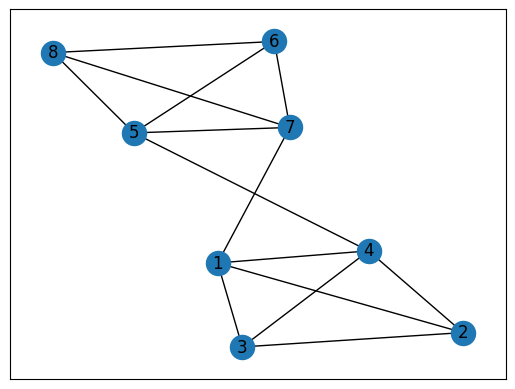

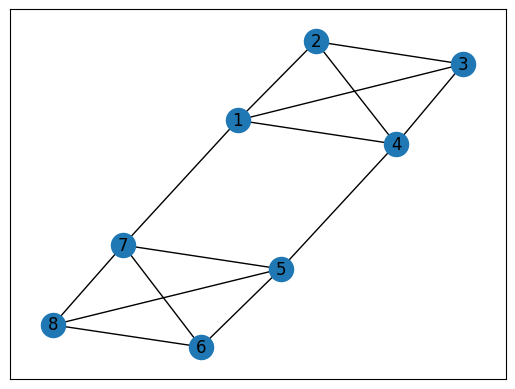

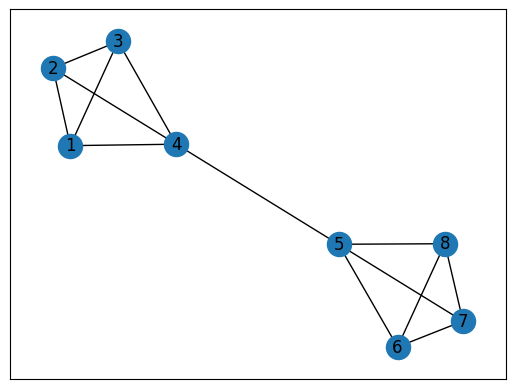

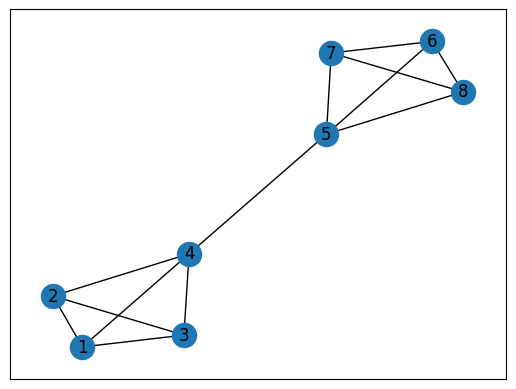

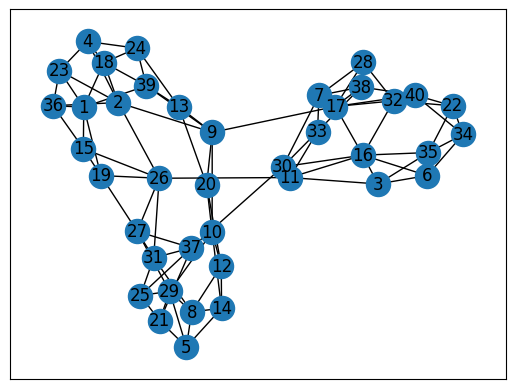

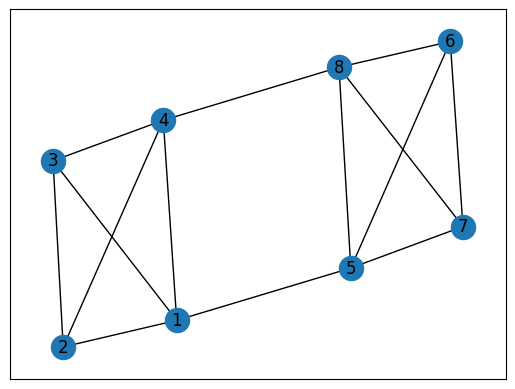

In [3]:
for i in range(1, 7):
    min_cut = float('inf')
    gr = Graph()
    test_folder = 'graph_test_cases/'
    test_file = f'test{i}.txt'
    for i in range(1):
        gr.read_file(test_folder + test_file, sep=' ')
        min_cut = min(min_cut, gr.contract())
    gr.read_file(test_folder + test_file, sep=' ')
    gr.visualize()